<a href="https://colab.research.google.com/github/njorogewacira001/.py/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

Cryptocurrency price prediction is a challenging task due to the volatile nature and complexity of the cryptocurrency market. However, accurate predictions can help traders and investors make informed decisions. Long Short-Term Memory (LSTM) models, a type of Recurrent Neural Network (RNN), have proven effective in time series forecasting, making them suitable for predicting cryptocurrency prices.

 **Importance of Cryptocurrency Price Prediction:**

Predicting cryptocurrency prices accurately can have significant implications for traders, investors, and other stakeholders in the market. It enables them to make informed investment decisions, manage risks, and potentially capitalize on market opportunities. Furthermore, understanding the factors influencing cryptocurrency prices can provide valuable insights into market trends and dynamics.

**Objectives of the Notebook:**

This notebook aims to analyze historical cryptocurrency data, identify patterns and trends, and develop an LSTM model to predict future cryptocurrency prices. Specifically, we will:

1. Explore and visualize historical cryptocurrency data.
2. Preprocess the data for LSTM model input.
3. Build an LSTM model for price prediction.
4. Train and evaluate the model's performance.
5. Analyze the model's predictions and compare them with actual values.
6. Identify potential limitations and suggest improvements for future research.

**Below is Breakdown of our task**

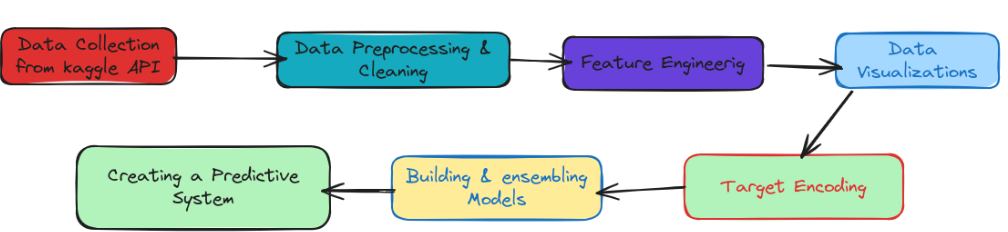

In [4]:
#instllation of Libraries
!pip install kaggle
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


# **Data Collection from Kaggle API**



In [5]:
#Upload kaggle json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gavinnjoroge","key":"2f18ff2a48d5df12589ada8adc591655"}'}

In [6]:
!ls /content


kaggle.json  predictor.pkl  sample_data


In [7]:
# from google.colab import userdata
# userdata.get('gavinnjoroge')

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

In [10]:
#download the dataset using kaggle API
!kaggle datasets download -d sudalairajkumar/cryptocurrency-historical-prices-coingecko --force

  0% 0.00/2.95M [00:00<?, ?B/s]
100% 2.95M/2.95M [00:00<00:00, 173MB/s]


# Data Loading

In [11]:
from google.colab import files
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
print('imported all libraries to use in price prediction')

imported all libraries to use in price prediction


In [12]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/cryptocurrency-historical-prices-coingecko.zip'
# Path to extract the files
extract_path = '/content/cryptocurrency-historical-prices-coingecko'
# Create a directory to extract the files
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['flow.csv', 'ethereum-classic.csv', 'ripple.csv', 'cardano.csv', 'crypto-com-chain.csv', 'chainlink.csv', 'dogecoin.csv', 'eos.csv', 'uniswap.csv', 'monero.csv', 'wrapped-bitcoin.csv', 'stellar.csv', 'tron.csv', 'ftx-token.csv', 'algorand.csv', 'shiba-inu.csv', 'staked-ether.csv', 'bitcoin.csv', 'dai.csv', 'binance-usd.csv', 'leo-token.csv', 'terra-luna.csv', 'matic-network.csv', 'binancecoin.csv', 'tether.csv', 'frax.csv', 'lido-dao.csv', 'bitcoin-cash.csv', 'quant-network.csv', 'tezos.csv', 'cosmos.csv', 'internet-computer.csv', 'decentraland.csv', 'avalanche-2.csv', 'usd-coin.csv', 'okb.csv', 'solana.csv', 'hedera-hashgraph.csv', 'vechain.csv', 'apecoin.csv', 'ethereum.csv', 'litecoin.csv', 'filecoin.csv', 'chain-2.csv', 'near.csv', 'chiliz.csv', 'axie-infinity.csv', 'the-sandbox.csv', 'theta-token.csv', 'polkadot.csv']


In [13]:
# Path to the CSV file within the extracted directory
csv_file_path = '/content/cryptocurrency-historical-prices-coingecko/data.csv'

In [14]:
print(csv_file_path)


/content/cryptocurrency-historical-prices-coingecko/data.csv


In [15]:
#load the extrated dataset
# the CSV file name
file_name = '/content/data/data.csv'


# **Data Prepocessing And Cleaning**

In [16]:
import os
import glob
import pandas as pd

# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file, index_col=0)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)

# Reset the index for a clean numbering of rows
merged_df.reset_index(drop=True, inplace=True)



In [17]:
# Print the first few rows and columns of the DataFrame

print(merged_df.columns)


Index(['price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')


In [18]:
df.head()

,price,total_volume,market_cap,coin_name
date,,,,
2020-08-19,2.936665,8.241398e+07,0.000000e+00,polkadot
2020-08-20,2.936665,8.241398e+07,0.000000e+00,polkadot
2020-08-21,2.898791,4.951174e+07,0.000000e+00,polkadot
2020-08-22,2.871923,5.123375e+07,0.000000e+00,polkadot
2020-08-23,4.481389,4.739210e+08,4.028277e+09,polkadot


In [19]:
df.tail()

,price,total_volume,market_cap,coin_name
date,,,,
2024-03-23,8.903507,3.049855e+08,1.195090e+10,polkadot
2024-03-24,9.015144,1.921722e+08,1.213391e+10,polkadot
2024-03-25,9.375923,1.961454e+08,1.261906e+10,polkadot
2024-03-26,9.726849,3.149472e+08,1.305885e+10,polkadot
2024-03-27,9.700408,3.799833e+08,1.302900e+10,polkadot


In [20]:
print(merged_df.head())

      price  total_volume    market_cap coin_name
0  6.936125  1.325994e+07  1.618211e+08      flow
1  6.936125  1.325994e+07  1.618211e+08      flow
2  7.153618  6.315209e+06  1.668088e+08      flow
3  6.398994  3.044608e+06  1.487694e+08      flow
4  9.030797  6.735979e+06  2.083067e+08      flow


In [21]:
print(merged_df.tail())

          price  total_volume    market_cap coin_name
98823  8.903507  3.049855e+08  1.195090e+10  polkadot
98824  9.015144  1.921722e+08  1.213391e+10  polkadot
98825  9.375923  1.961454e+08  1.261906e+10  polkadot
98826  9.726849  3.149472e+08  1.305885e+10  polkadot
98827  9.700408  3.799833e+08  1.302900e+10  polkadot


In [22]:
print("Number of unique coins:", merged_df['coin_name'].nunique())


Number of unique coins: 50


In [23]:
print("Length of df_list:", len(df_list))

Length of df_list: 50


In [24]:
print("Shape of merged_df:", merged_df.shape)

Shape of merged_df: (98828, 4)


In [25]:
# check the null values
df.isnull().sum()

price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [26]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float', 'int']).columns
X_train = df[num_cols]

In [27]:
# Handle missing values
X_train = X_train.fillna(0)

In [28]:
# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)



In [29]:
merged_df['coin_name'].nunique()

50

In [30]:
merged_df.nunique()

date             5529
price           97799
total_volume    98759
market_cap      95983
coin_name          50
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1317 non-null   object 
 1   price         1317 non-null   float64
 2   total_volume  1317 non-null   float64
 3   market_cap    1317 non-null   float64
 4   coin_name     1317 non-null   object 
dtypes: float64(3), object(2)
memory usage: 51.6+ KB


In [32]:
df['price'] = df['price'].astype(np.float32)
df['total_volume'] = df['total_volume'].astype(np.float32)
df['market_cap'] = df['market_cap'].astype(np.float32)


In [33]:
df['date'] = df.index  # Create a new 'date' column with the DataFrame index
df['date'] = pd.to_datetime(df['date'])  # Convert it to datetime format


In [34]:
df.drop_duplicates(inplace=True)


# Feature Engineering

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Check for missing values in each column
print(merged_df.isna().sum())

# Drop rows with missing values
merged_df.dropna(inplace=True)




date            0
price           0
total_volume    0
market_cap      5
coin_name       0
dtype: int64


In [36]:
merged_df.index = pd.to_datetime(merged_df.index, errors='coerce')
merged_df['date'] = merged_df.index


In [37]:
# Scale numeric values in specific columns to a range between 0 and 1
scaler = MinMaxScaler()
numeric_cols = ['price', 'total_volume', 'market_cap']
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

In [38]:
# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)




In [39]:
# Check the number of unique values in the 'coin_name' column
print(merged_df['coin_name'].nunique())

50


In [40]:
df.isna().sum()*100/df.shape[0]

date            0.0
price           0.0
total_volume    0.0
market_cap      0.0
coin_name       0.0
dtype: float64

# Data Visualizations

In [41]:
#  Display the descriptive statistics
print(df.describe())

             price  total_volume    market_cap
count  1317.000000  1.317000e+03  1.317000e+03
mean     13.803489  7.642959e+08  1.476585e+10
std      11.785841  9.093123e+08  1.172913e+10
min       2.871923  4.350072e+07  0.000000e+00
25%       5.327654  1.872342e+08  6.517887e+09
50%       7.317350  3.821601e+08  8.817940e+09
75%      19.742708  1.045829e+09  2.085268e+10
max      54.142860  7.440268e+09  5.657831e+10


In [42]:
# Display the class label distribution
print(df['price'].value_counts())

price
2.936665     2
6.254683     1
5.655251     1
5.963398     1
5.810048     1
            ..
42.736192    1
44.123768    1
42.073440    1
40.488196    1
9.700408     1
Name: count, Length: 1316, dtype: int64


In [43]:
print(df['total_volume'].value_counts())

total_volume
8.241398e+07    2
2.604764e+08    1
4.412321e+08    1
3.960463e+08    1
3.669479e+08    1
               ..
9.219540e+08    1
2.174027e+09    1
2.837544e+09    1
2.822545e+09    1
3.799833e+08    1
Name: count, Length: 1316, dtype: int64


In [44]:
print(df['market_cap'].value_counts())

market_cap
0.000000e+00    4
7.461521e+09    1
6.726902e+09    1
7.098249e+09    1
6.914983e+09    1
               ..
5.253089e+10    1
4.488613e+10    1
4.463083e+10    1
4.604809e+10    1
1.302900e+10    1
Name: count, Length: 1314, dtype: int64


<Axes: ylabel='Frequency'>

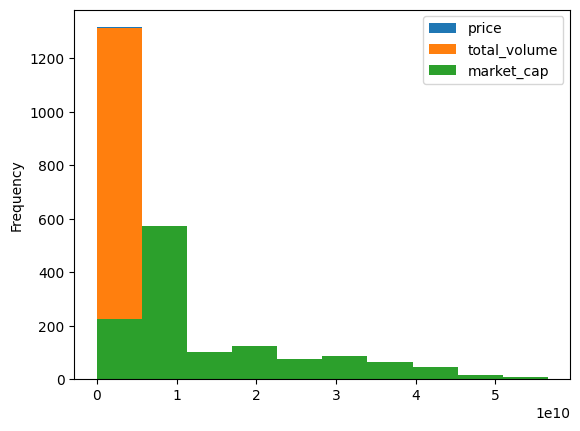

In [45]:
df.plot(kind='hist')

<Axes: >

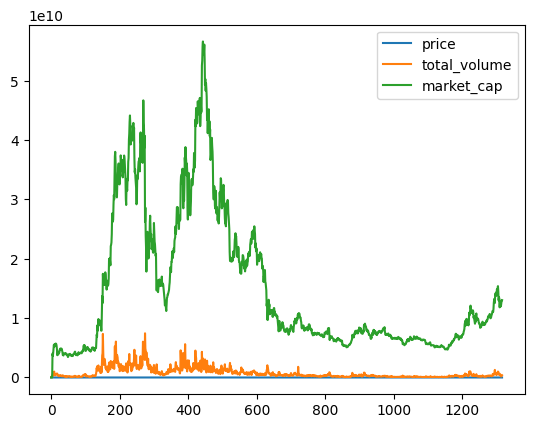

In [46]:
df.plot()

<Axes: >

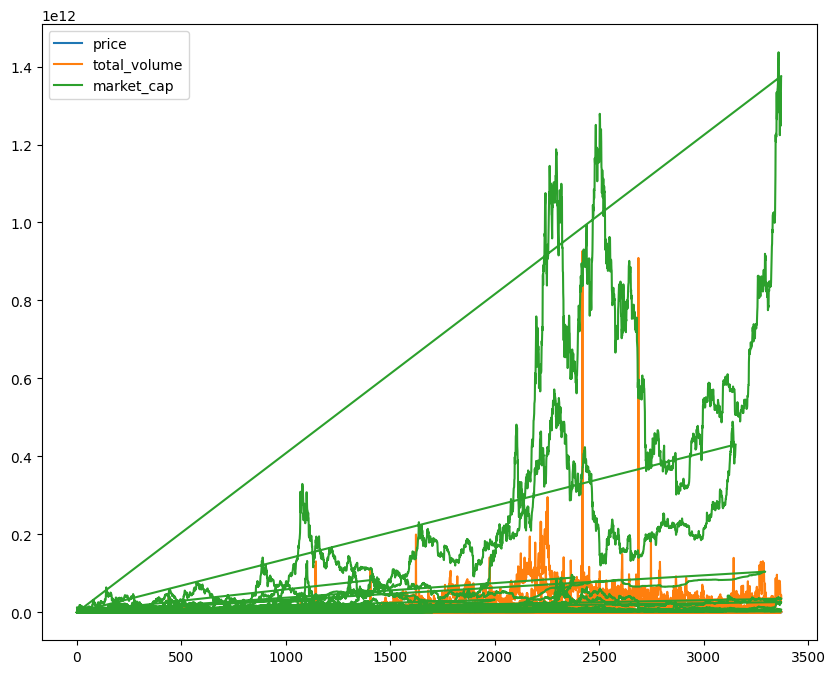

In [47]:


# Plot the entire DataFrame
merged_df.plot(kind='line', figsize=(10, 8))


<Axes: xlabel='date'>

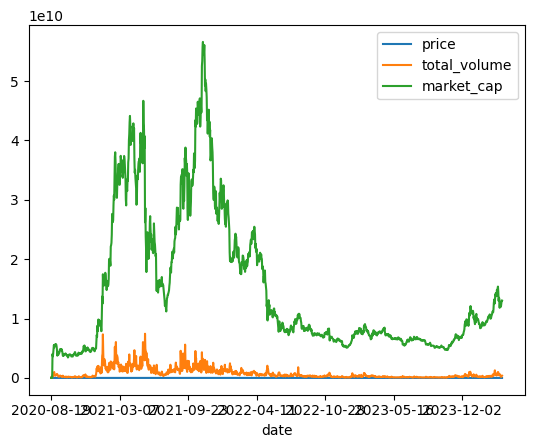

In [48]:
df.plot (kind='line', x='date', y= ['price', 'total_volume', 'market_cap'])

<Axes: xlabel='date'>

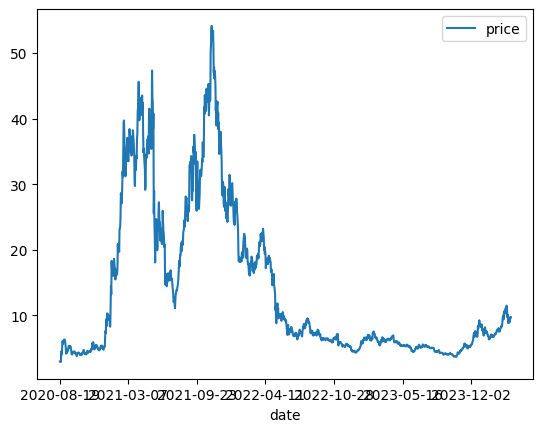

In [49]:
df.plot (kind='line', x='date', y= ['price'])

<Axes: xlabel='date'>

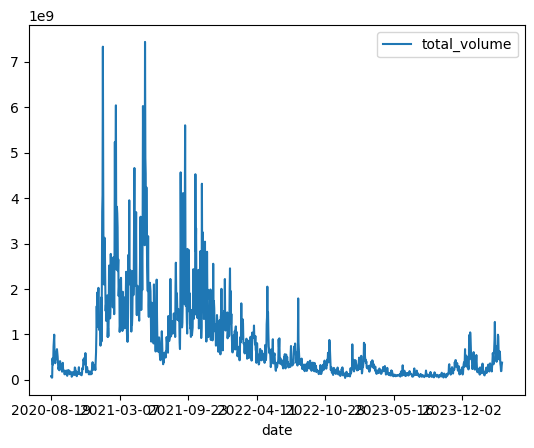

In [50]:
df.plot (kind='line', x='date', y= ['total_volume'])

<Axes: xlabel='date'>

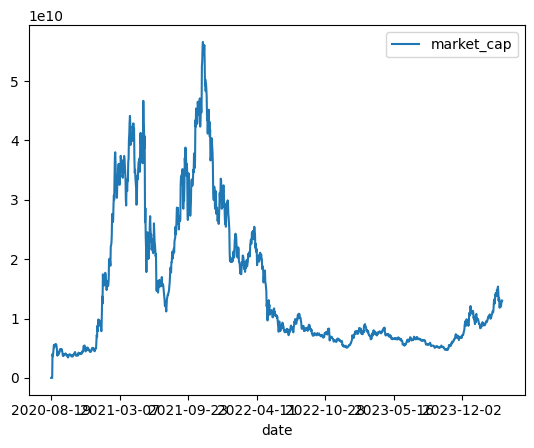

In [51]:

  df.plot (kind='line', x='date', y= ['market_cap'])


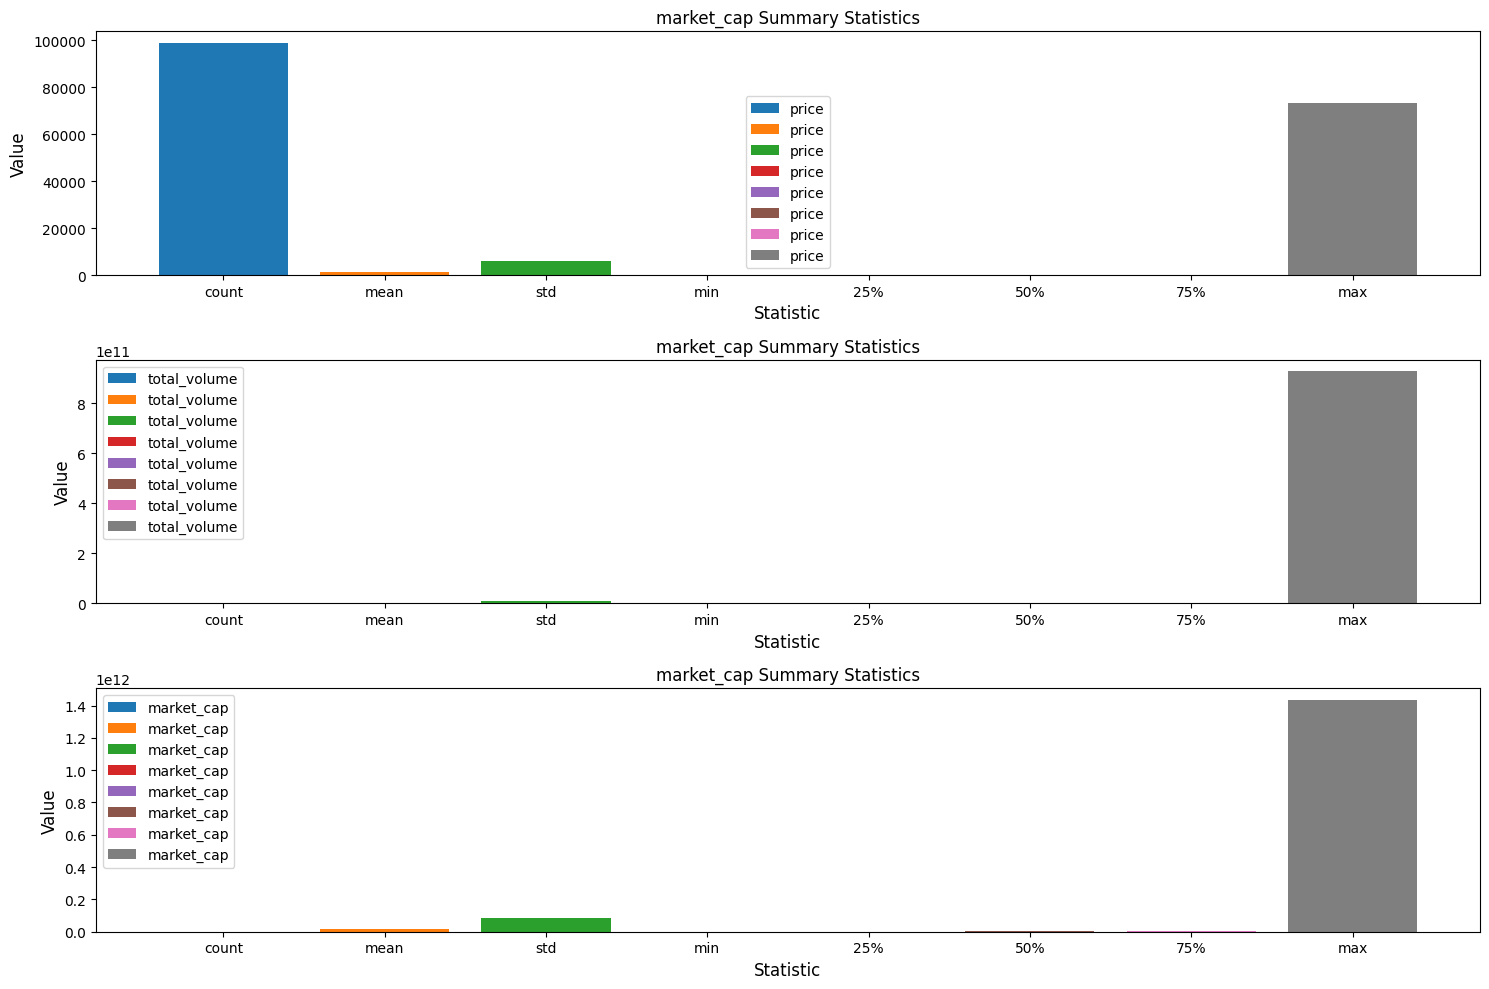

In [52]:

# Create a figure with 3 subplots (one for each statistic)
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot each statistic on a separate subplot
for i, column in enumerate(['price', 'total_volume', 'market_cap']):
    for stat, value in merged_df[column].describe().items():
        axes[i].bar(stat, value, label=column)

# Add titles, labels, and font properties
for ax in axes:
    ax.set_title(f'{column} Summary Statistics')
    ax.set_xlabel('Statistic', fontdict={'family': 'Arial', 'size': 12})
    ax.set_ylabel(f'Value', fontdict={'family': 'Arial', 'size': 12})
    ax.legend()

# Show the bar charts
plt.tight_layout()
plt.show()


In [53]:
merged_df.columns

Index(['date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')

In [54]:
merged_df.set_index('price', inplace=True)


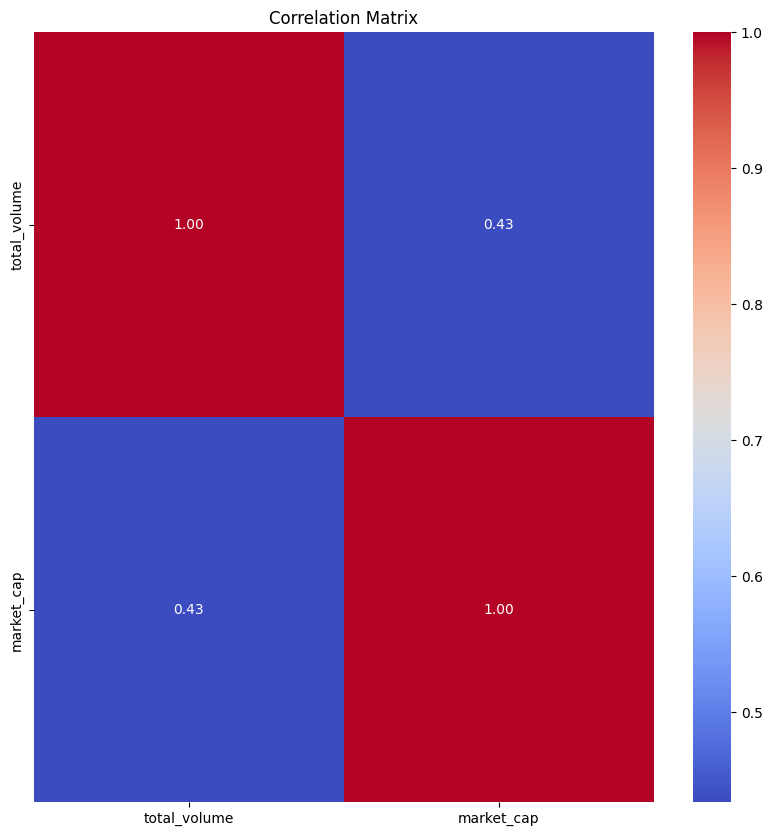

In [55]:
import seaborn as sns
import pandas as pd

# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns

# Create a correlation matrix using only numeric columns
correlation_matrix = merged_df[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Target Encoding**

In [56]:
from category_encoders.target_encoder import TargetEncoder


In [57]:
print(df.columns)


Index(['date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')


In [58]:
# # Drop the "date" column
# df = df.drop(columns=['date'])

# # Check the columns of the DataFrame
# print(df.columns)


In [59]:
columns = ['coin_name']


In [60]:
columns = ['coin_name']
for col in columns:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(X=df[[col]], y=df['price'])


In [61]:
df['date'] = pd.to_datetime(df['date']).astype(int) // 10 ** 9


In [62]:
df.head()

,date,price,total_volume,market_cap,coin_name
0,1597795200,2.936665,8.241398e+07,0.000000e+00,13.803489
1,1597881600,2.936665,8.241398e+07,0.000000e+00,13.803489
2,1597968000,2.898791,4.951174e+07,0.000000e+00,13.803489
3,1598054400,2.871923,5.123375e+07,0.000000e+00,13.803489
4,1598140800,4.481389,4.739210e+08,4.028277e+09,13.803489


In [63]:
df.tail()

,date,price,total_volume,market_cap,coin_name
1312,1711152000,8.903507,3.049855e+08,1.195090e+10,13.803489
1313,1711238400,9.015144,1.921722e+08,1.213391e+10,13.803489
1314,1711324800,9.375923,1.961454e+08,1.261906e+10,13.803489
1315,1711411200,9.726849,3.149472e+08,1.305885e+10,13.803489
1316,1711497600,9.700408,3.799833e+08,1.302900e+10,13.803489


# **Building a Model**

In [64]:
# Display the class label distribution
print(df['price'].value_counts())

price
2.936665     2
6.254683     1
5.655251     1
5.963398     1
5.810048     1
            ..
42.736192    1
44.123768    1
42.073440    1
40.488196    1
9.700408     1
Name: count, Length: 1316, dtype: int64


In [65]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))

In [66]:
scaled_data = scaler.fit_transform(df['price'].values.reshape(-1,1))

# **Train Test Split**

In [67]:
# Define window size for LSTM model
window_size = 120

In [68]:
# Split the data into training and testing sets
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [70]:
# Define num_cols
num_cols = ["price", "total_volume", "market_cap"]

# Fill missing values with 0
X_test = df[num_cols].fillna(0)

# Fit and transform the scaler on X_test
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)


In [71]:
X_test = df[num_cols]
X_test = X_test.fillna(0)
X_test = scaler.transform(X_test)

In [72]:
# Normalize the features
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#_test = scaler.transform(X_test)

In [73]:
# Create sequences of data for LSTM model
X, y = [], []
for i in range(window_size, len(df)):
    X.append(scaled_data[i-window_size:i, :])
    y.append(scaled_data[i, 0])
    # Create sequences of data for LSTM model
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

In [74]:
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [76]:
X_train.shape

(1053, 1, 120, 1)

In [ ]:
X_test


In [ ]:
y_test

In [79]:
# Define Early Stopping Callback

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [80]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

In [81]:
# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_train, y_train), callbacks=[early_stopping])


Epoch 1/100
33/33 [==============================] - 13s 81ms/step - loss: 0.0482 - val_loss: 0.0176
Epoch 2/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0119 - val_loss: 0.0062
Epoch 3/100
33/33 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0047
Epoch 4/100
33/33 [==============================] - 1s 16ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 6/100
33/33 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 8/100
33/33 [==============================] - 1s 27ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 9/100
33/33 [==============================] - 0s 11ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 10/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.002

In [82]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"MSE: {loss}")

5/5 [==============================] - 0s 4ms/step - loss: 9.1447e-05
MSE: 9.144694922724739e-05


In [83]:
from sklearn.metrics import r2_score

# Assuming 'model' is your trained regression model
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
percentage_accuracy = r_squared * 100
print(f"R-squared: {r_squared}")
print(f"Percentage Accuracy: {percentage_accuracy}%")


5/5 [==============================] - 1s 3ms/step
R-squared: 0.9062014827068898
Percentage Accuracy: 90.62014827068899%


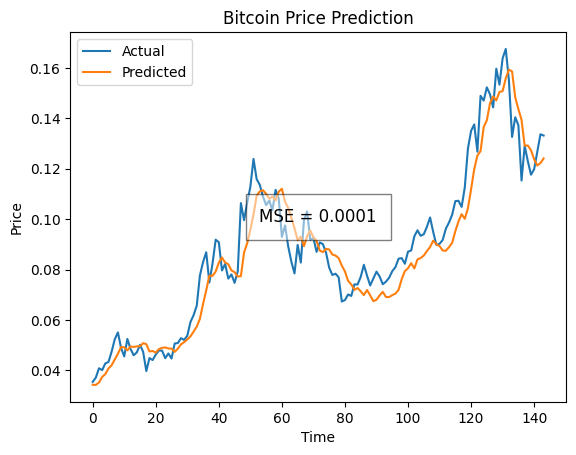

In [92]:
import matplotlib.pyplot as plt

# ... Your existing code for data preparation, model training, and predictions ...
# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Calculate MSE and format it to 4 decimal places
mse = float(mean_squared_error(y_test, predictions))
mse_formatted = "{:.4f}".format(mse)

# Add a text box with the MSE
plt.text(0.5, 0.5, f"MSE = {mse_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()

In [85]:
# Assuming you already have calculated the MSE and stored it in the variable 'loss'
mse = loss

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.009562789824483615


In [86]:
# Assuming you have predictions generated by your model stored in a variable named 'predictions'
predictions = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)/
mae = np.mean(np.abs(y_test - predictions))
print("Mean Absolute Error (MAE):", mae)


5/5 [==============================] - 0s 6ms/step
Mean Absolute Error (MAE): 0.007490895061228973


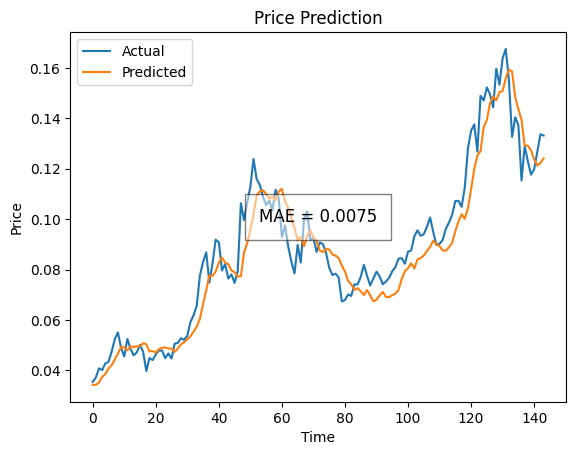

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate MAE and format it to 4 decimal places
mae = float(np.mean(np.abs(y_test - predictions)))
mae_formatted = "{:.4f}".format(mae)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the MAE
plt.text(0.5, 0.5, f"MAE = {mae_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [87]:

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = 100 * np.mean(np.abs((y_test - predictions) / y_test))
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 8.464471069121778


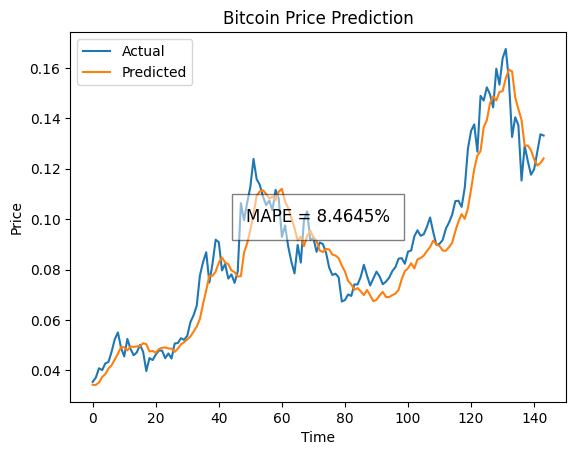

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate MAPE and format it to 4 decimal places
mape = float(np.mean(np.abs((y_test - predictions) / y_test))) * 100
mape_formatted = "{:.4f}".format(mape)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the MAPE
plt.text(0.5, 0.5, f"MAPE = {mape_formatted}%", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [88]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predictions)
print("R-squared (R2) score:", r2_score)

R-squared (R2) score: 0.9062014827068898


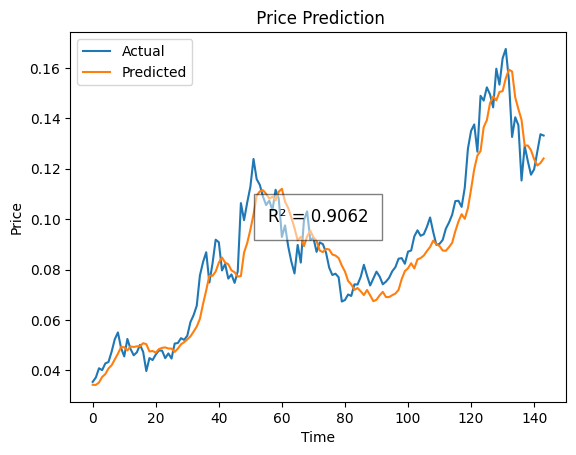

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate R² and format it to 4 decimal places
r2 = r2_score(y_test, predictions)
r2_formatted = "{:.4f}".format(r2)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title(' Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the R² score
plt.text(0.5, 0.5, f"R² = {r2_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... Your existing code ...
mse = float(mean_squared_error(y_test, predictions))
mae = float(mean_absolute_error(y_test, predictions))
rmse = float(np.sqrt(mean_squared_error(y_test, predictions)))
r2 = float(r2_score(y_test, predictions))

plt.text(0.5, 0.5, f"MSE = {mse:.4f}\nMAE = {mae:.4f}\nRMSE = {rmse:.4f}\nR2 = {r2:.4f}",
         transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()


In [95]:
features = ['price', 'total_volume', 'market_cap']


In [94]:

def predict_price(details):
    # Convert the details to a DataFrame
    df = pd.DataFrame(data=[details], columns=features)

    # Preprocess the details in the same way as the training data
    details = scaler.transform(df)

    # Use the trained model to make a prediction
    prediction = model.predict(details)

    # Scale back the prediction to the original scale
    prediction = scaler.inverse_transform(prediction)

    # Display a message
    print(f"Predicted price: {prediction[0]:.4f}")

    return prediction[0]


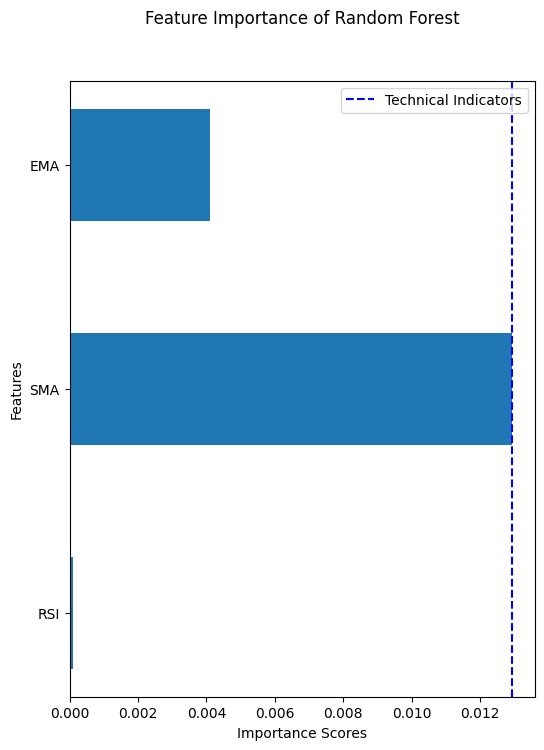

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names
features = ['RSI', 'SMA', 'EMA']

# Importance scores (assuming these are the values from the image)
importance_scores = np.array([0.00009, 0.01294, 0.00411])

# Technical indicators importance score (from the image)
tech_indicators_importance = 0.01294

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Flatten the importance scores
importance_scores = importance_scores.flatten()

# Plot the importance scores as horizontal bars with thin width
ax.barh(range(len(features)), importance_scores, align='center', height=0.5)

# Set the y-ticks and labels
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)

# Add a vertical line for the technical indicators importance
ax.axvline(x=tech_indicators_importance, color='b', linestyle='--', label='Technical Indicators')

# Add labels and title
ax.set_xlabel('Importance Scores')
ax.set_ylabel('Features')
ax.set_title('Feature Importance of Random Forest', y=1.08)  # Adjust the title position

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

In [96]:
import pickle

# Define the file name to save the model
filename = 'predictor.pkl'

# Open the file in write-binary mode
with open(filename, 'wb') as file:
    # Serialize and save the model to the file
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


In [97]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [98]:
import streamlit as st
import pickle
import numpy as np

# Load the pickled model
with open('predictor.pkl', 'rb') as file:
    model = pickle.load(file)

# Define your Streamlit app
def main():
    st.title('LSTM Predictor')

    # User input
    user_input = st.text_input('Enter some input:', '')

    # Example of using the model
    if st.button('Predict'):
        # Preprocess user input if needed
        # For example, convert text to numerical data if your model expects numerical input

        # Example: Convert user input to numpy array (assuming your model expects numerical input)
        input_array = np.array([float(user_input)])

        # Make prediction
        prediction = model.predict(input_array.reshape(1, -1))

        # Display prediction
        st.write('Prediction:', prediction)

if __name__ == '__main__':
    main()


2024-04-28 17:50:13.261 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run --help


In [105]:
! pip install streamlit -q

In [111]:
!wget -q -O - ipv4.icanhazip.com

34.150.196.40


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.196.40:8501

npx: installed 22 in 2.35s
your url is: https://new-grapes-share.loca.lt
2024-04-28 19:34:07.635722: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 19:34:07.635854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 19:34:07.639207: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-28 19:34:09.571693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
